<a href="https://colab.research.google.com/github/NileshPatil24-a/Deep_Learning/blob/main/random_weight_initialization(small_value).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import  numpy as np
import seaborn as sns

In [34]:
df = sns.load_dataset('iris')

In [35]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
8,4.4,2.9,1.4,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [37]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [39]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]


In [40]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 4))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
initial_weights = model.get_weights()
initial_weights

[array([[ 0.5357461 ,  0.8748925 ,  0.31396496],
        [ 0.02037454,  0.2417754 , -0.3080482 ],
        [ 0.32061028,  0.7798306 ,  0.7212883 ],
        [ 0.65682423,  0.7991502 ,  0.03499717]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.76825833, -0.3045709 ,  0.7482221 ],
        [ 0.16106081, -0.1454153 , -0.25036407],
        [ 0.67423654, -0.6689787 ,  0.991786  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.28056908,  0.06446719, -0.62959814],
        [ 0.15857387,  0.37894487,  0.79965067],
        [-0.9432409 , -0.02934408,  0.74248075]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.2371285 , -0.04218006, -0.02622294],
        [ 0.68179846,  0.5062103 ,  0.17727613],
        [-0.5972545 , -0.15972614, -0.98008466]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.428594 ],
        [-1.2102196],
        [-1.0607084]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
initial_weights[0] = np.random.randn(initial_weights[0].shape[0], initial_weights[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(initial_weights[1].shape)
initial_weights[2] = np.random.randn(initial_weights[2].shape[0], initial_weights[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(initial_weights[3].shape)
initial_weights[4] = np.random.randn(initial_weights[4].shape[0], initial_weights[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(initial_weights[5].shape)


In [44]:
model.set_weights(initial_weights)

In [45]:
model.get_weights()

[array([[-0.01631719, -0.02288552, -0.02220676],
        [-0.01671458,  0.00275542,  0.00301591],
        [ 0.00707969,  0.00890811, -0.01601381],
        [-0.00897579,  0.0160994 , -0.00483447]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.00889204,  0.02151456, -0.00202319],
        [ 0.01097456, -0.00185469,  0.00597691],
        [-0.02926086, -0.01561625,  0.00018643]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.01412354,  0.00034175,  0.00152117],
        [-0.0041583 , -0.0025502 ,  0.00603294],
        [-0.00439447,  0.0025584 ,  0.00657494]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.2371285 , -0.04218006, -0.02622294],
        [ 0.68179846,  0.5062103 ,  0.17727613],
        [-0.5972545 , -0.15972614, -0.98008466]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.428594 ],
        [-1.2102196],
        [-1.0607084]], dtype=float32),
 array([0.], dtype=float32)]

In [50]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(X,y, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8552 - loss: -0.4918 - val_accuracy: 0.0000e+00 - val_loss: -3.6869
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8208 - loss: -0.6242 - val_accuracy: 0.0000e+00 - val_loss: -3.7124
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8083 - loss: -0.6753 - val_accuracy: 0.0000e+00 - val_loss: -3.7377
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8583 - loss: -0.4929 - val_accuracy: 0.0000e+00 - val_loss: -3.7616
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8292 - loss: -0.6070 - val_accuracy: 0.0000e+00 - val_loss: -3.7866
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8375 - loss: -0.5811 - val_accuracy: 0.0000e+00 - val_loss: -3.8111
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8656 - loss: -0.4762 - val_accuracy: 0.0000e+00 - val_loss: -3.8352
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8490 - loss:

In [54]:
model.get_weights()

[array([[ 0.1040677 , -0.12445448,  0.10454965],
        [ 0.24723786, -0.24864464,  0.271741  ],
        [-0.38664573,  0.4117955 , -0.41087723],
        [-0.44358847,  0.45496598, -0.4410984 ]], dtype=float32),
 array([ 0.21076348, -0.19658023,  0.21563387], dtype=float32),
 array([[-0.4541838 , -0.42820325, -0.45196435],
        [ 0.45446113,  0.444958  ,  0.45402318],
        [-0.47502533, -0.46514064, -0.45091286]], dtype=float32),
 array([0.04214181, 0.04839818, 0.04656827], dtype=float32),
 array([[ 0.5725788 , -0.47303572,  0.45107013],
        [ 0.56675255, -0.4869875 ,  0.4674193 ],
        [ 0.56105137, -0.47683892,  0.46288988]], dtype=float32),
 array([ 0.16739738, -0.11191331,  0.09652483], dtype=float32),
 array([[ 1.1703991 , -0.64054304, -0.57171756],
        [-0.24507901,  1.0994927 ,  0.71822035],
        [ 0.32698455, -0.75060946, -1.5184685 ]], dtype=float32),
 array([ 0.3769005 , -0.17866883, -0.13021438], dtype=float32),
 array([[ 0.9782256],
        [-2.1767695]

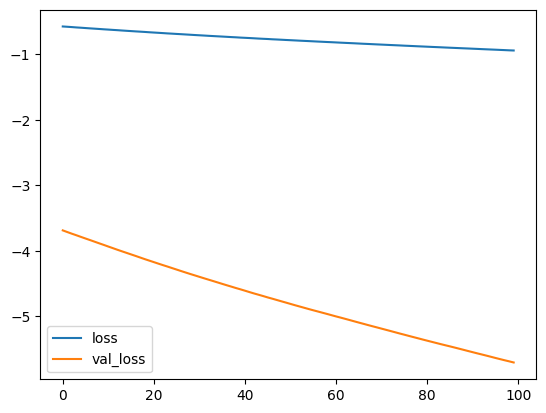

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
